In [3]:
#Импортируем библиотеки
from sklearn import linear_model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Открываем датасет
data = pd.read_csv ('Data_Cortex_Nuclear.csv')
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Значения колонок можно узнать на сайте, с которого скачан датасет:
    
MouseID - идентификационный номер мыши. В эксперименте участвовали 72 мыши, и для каждой было проведено 15 измерений;
От DYRK1A_N до CaNA_N - названия 77 разных белков, экспрессию которых измеряли;
Genotype - генотип: Control (c) - здоровая мышь, Ts65Dn (t) - мышь с синдромом Дауна;
Treatment - инъекции: Memantine - мемантина (используется в терапии болезни Альцгеймера), Saline - солевого раствора;
Behavior - поведение: C/S - стимулированные к обучению, S/C - не стимулированные к обучению
class - комбинация Genotype, Treatment и Behaviour.

# График: корреляция между экспрессией генов

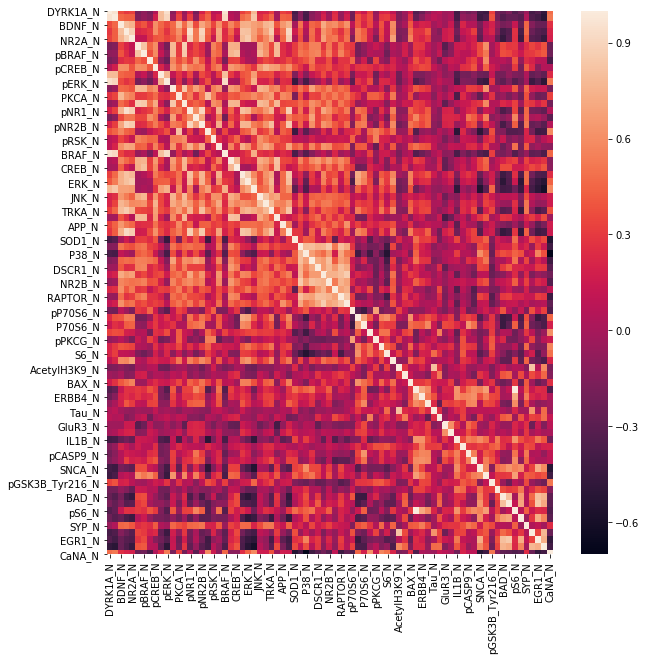

In [4]:
#Можно построить график, иллюстрирующий корреляцию между эскпрессией разных белков
plt.figure(figsize=(10, 10))
_ = data.corr()
sns.heatmap(_)

Вывод: по получившемуся графику видно, что, например, сильная положительная корреляция существует между экспрессией генов DYRK1A и BDNF, а сильная отрицательная - между эскпрессией генов DYRK1A и EGR1.

# Диаграмма: доли выборки по поведению

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


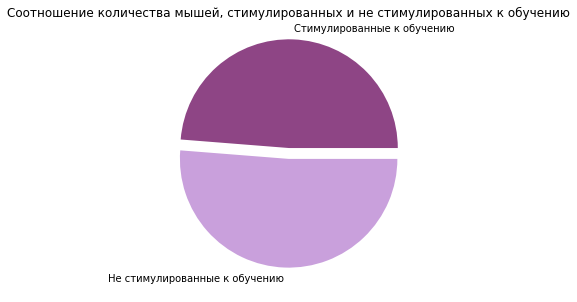

In [5]:
fig = plt.figure(figsize=(5, 5))
b = data[['Behavior']].copy()
learn = b[b=='C/S'].count()
notlearn = b[b=='S/C'].count()

bDistr = [learn, notlearn]
plt.title('Соотношение количества мышей, стимулированных и не стимулированных к обучению')
Pie = plt.pie(bDistr,
              labels=['Cтимулированные к обучению', 'Не стимулированные к обучению'],
              shadow=False, colors=['#8e4585', '#c9a0dc'], explode=(0.1, 0))

Вывод: диаграмма показывает, что в выборке было примерно равное количество мышей, стимулированных и не стимулированных к обучению, с небольшим преобладанием второй группы.

# Таблицы: инъекции, генотип и поведение

In [6]:
#Построим таблицы, чтобы узнать, сколько в выборке мышей с разными комбинациями значений по этим показателям
print('Таблицы сопряженности:')
print('Behavior: C/S - stimulated to learn, S/C - not stimulated to learn')
print(' ')
print('          C/S S/C')
Mem_CS = len(data[data['Treatment']=='Memantine'][data['Behavior']=='C/S'])
Mem_SC = len(data[data['Treatment']=='Memantine'][data['Behavior']=='S/C'])
Sal_CS = len(data[data['Treatment']=='Saline'][data['Behavior']=='C/S'])
Sal_SC = len(data[data['Treatment']=='Saline'][data['Behavior']=='S/C'])
print(f'Memantine {Mem_CS} {Mem_SC}')
print(f'Saline    {Sal_CS} {Sal_SC}')
print(' ')
print('          C/S S/C')
Con_CS = len(data[data['Genotype']=='Control'][data['Behavior']=='C/S'])
Con_SC = len(data[data['Genotype']=='Control'][data['Behavior']=='S/C'])
Tri_CS = len(data[data['Genotype']=='Ts65Dn'][data['Behavior']=='C/S'])
Tri_SC = len(data[data['Genotype']=='Ts65Dn'][data['Behavior']=='S/C'])
print(f'Control   {Con_CS} {Con_SC}')
print(f'Trisomic  {Tri_CS} {Tri_SC}')
print(' ')
print('          Memantine Saline')
Con_Mem = len(data[data['Genotype']=='Control'][data['Treatment']=='Memantine'])
Con_Sal = len(data[data['Genotype']=='Control'][data['Treatment']=='Saline'])
Tri_Mem = len(data[data['Genotype']=='Ts65Dn'][data['Treatment']=='Memantine'])
Tri_Sal = len(data[data['Genotype']=='Ts65Dn'][data['Treatment']=='Saline'])
print(f'Control     {Con_Mem}      {Con_Sal}')
print(f'Trisomic    {Tri_Mem}      {Tri_Sal}')

Таблицы сопряженности:
Behavior: C/S - stimulated to learn, S/C - not stimulated to learn
 
          C/S S/C
Memantine 285 285
Saline    240 267
 
          C/S S/C
Control   285 285
Trisomic  240 267
 
          Memantine Saline
Control     300      270
Trisomic    270      237


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to matc

# Предсказание генотипа мыши по экспрессии гена DYRK1A и поведению

DYRK1A - это киназа, которая, вероятно, играет роль в сигнальных путях, регулирующих пролиферацию клеток, и участвует в развитии мозга.
Ген DYRK1A расположен в важном для синдрома Дауна участке генома, и, предположительно, отвечает за дефекты способности к обучению у больных.

In [12]:
#Переводим категориальные переменные из текстовых в числовые
data1_list = []
data1_list.append(pd.get_dummies(data['Behavior'], prefix = 'Behavior'))
data1_list.append(pd.get_dummies(data['Genotype'], prefix = 'Genotype'))
data1 = pd.concat(data1_list, axis = 1)
data1.head() #Смотрим на первые строки получившейся таблицы

,Behavior_C/S,Behavior_S/C,Genotype_Control,Genotype_Ts65Dn
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0


In [13]:
#Указываем, что и на основании чего нужно будет предсказывать
y = data['Genotype']
X = data['Behavior'],data['DYRK1A_N']

#Разбиваем выборку на тренировочную (9/10) и тестовую (1/10)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
Xtrain, Xtest, ytrain, ytest = train_test_split(data1, y, test_size=0.1)

#Классификатор
clas = linear_model.RidgeClassifier()
clas.fit(Xtrain, ytrain) #Модель тренируется
ypred = clas.predict(Xtest) #Модель предсказывает
accuracy_score = np.sum(ypred == ytest)/ytest.shape #Узнаём точность предсказания
print(accuracy_score)

[1.]


Вывод: точность предсказания равна 1.0

# График: экспрессия гена NR1 в зависимости от инъекций мемантина

Ген NR1 кодирует субъединицу рецептора NMDA, антагонистом которого является мемантин

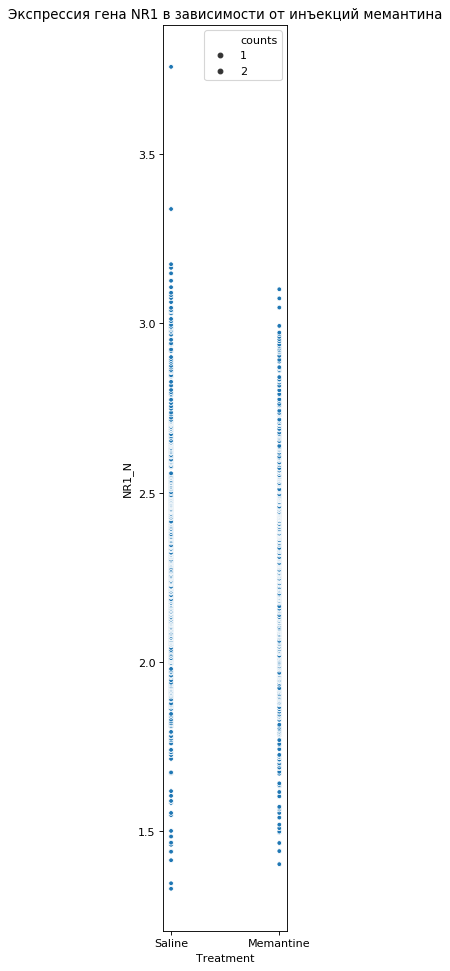

In [23]:
data_counts = data.groupby(['NR1_N', 'Treatment']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(2,15), dpi= 80)    
sns.scatterplot(data_counts.Treatment, data_counts.NR1_N, size=data_counts.counts*2, ax=ax)
plt.title('Экспрессия гена NR1 в зависимости от инъекций мемантина', fontsize=12)
plt.show()

Вывод: экспрессия гена NR1 чуть выше у мышей, получавших инъекции солевого раствора, чем у мышей, получавших инъекции мемантина